# ESD for Pytorch pretrained models
http://pytorch.org/docs/master/torchvision/models.html

### (Hand-Tuned) MP and PowerLaw fits of AlexNet FC1, FC2, and FC3

- As presented in Section 4.2 

- Uses pre-trained models in pyTorch 

- Automated MP fits, using a Kernel Density Estimator (KDE), are in a seperate Notebook

### PowerLaw Analysis of FC3

- Section 5.5 and Figure 11 



In [25]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn as nn

import numpy as np
import scipy as sp
from scipy.linalg import svd

import powerlaw

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [26]:
import import_ipynb
import RMT_Util

In [27]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]


### Reset fontsize for paper

In [28]:
matplotlib.rcParams.update({'font.size': 16})

In [29]:
alexnet = models.alexnet(pretrained=True)

In [30]:
### Layer Ids

FC1_LAYER_ID = 17
FC2_LAYER_ID = 20
FC3_LAYER_ID = 22


### Marchenko Pastur Fit

## FC1

In [31]:
this_im = FC1_LAYER_ID

for im, m in enumerate(alexnet.modules()):
    print(im, m)
    if im == this_im:
        W_FC1 = np.array(m.weight.data.clone().cpu()) 
        Q = RMT_Util.get_Q(W_FC1)
        
        u, sv, sh = svd(W_FC1)
        
        evals_FC1 = sv*sv

0 AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_featu

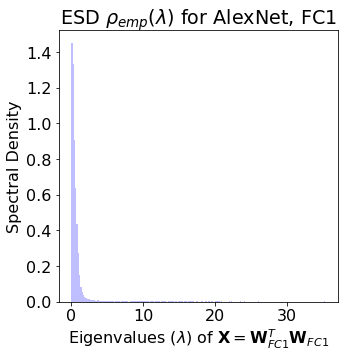

In [106]:
plt.hist(evals_FC1, bins=200,  alpha=0.25, color='blue', density=True);
plt.title(r"ESD $\rho_{emp}(\lambda)$ for AlexNet, FC1")
plt.ylabel(r"Spectral Density")
plt.xlabel(r"Eigenvalues ($\lambda$) of $\mathbf{X}=\mathbf{W}_{FC1}^{T}\mathbf{W}_{FC1}$")
plt.savefig("img/alexnet-fc1-full.png")

RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Util\n",
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in multiply
  "## RMT Util\n",


% spikes outside bulk 11.13
% sigma 0.5047


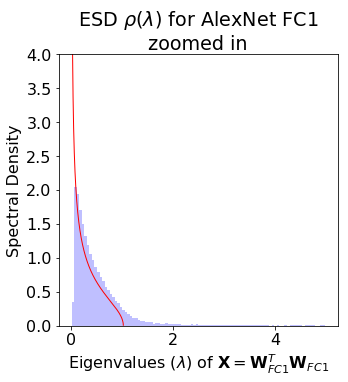

In [123]:
sigma = RMT_Util.plot_ESD_and_fit(model=None,eigenvalues=evals_FC1[evals_FC1<5], weightfile=None, layer=None, 
                            Q=Q, num_spikes = 400, sigma=None, color='blue')
plt.title(r"ESD $\rho(\lambda)$ for AlexNet FC1"+"\n"+r"zoomed in")
plt.ylabel(r"Spectral Density")
plt.xlabel(r"Eigenvalues ($\lambda$) of $\mathbf{X}=\mathbf{W}_{FC1}^{T}\mathbf{W}_{FC1}$")
plt.ylim(0,4)
plt.savefig("img/alexnet-fc1.png")

## FC2

In [34]:
this_im = FC2_LAYER_ID

for im, m in enumerate(alexnet.modules()):
    print(im,m)
    if im == this_im:
        W_FC2 = np.array(m.weight.data.clone().cpu()) 
        Q = RMT_Util.get_Q(W_FC2)
        
        u, sv, sh = svd(W_FC2)
        evals_FC2 = sv*sv
        

0 AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_featu

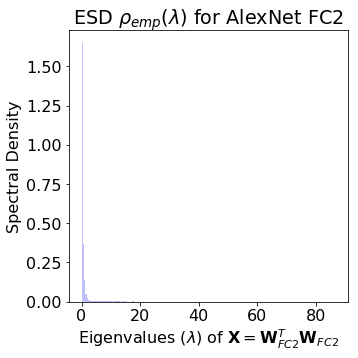

In [109]:
plt.hist(evals_FC2, bins=200,  alpha=0.25, color='blue', density=True);
plt.title(r"ESD $\rho_{emp}(\lambda)$ for AlexNet FC2")
plt.ylabel(r"Spectral Density")
plt.xlabel(r"Eigenvalues ($\lambda$) of $\mathbf{X}=\mathbf{W}_{FC2}^{T}\mathbf{W}_{FC2}$")
plt.savefig("img/alexnet-fc2-full.png")

RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Util\n",
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in multiply
  "## RMT Util\n",


% spikes outside bulk 12.61
% sigma 0.4625


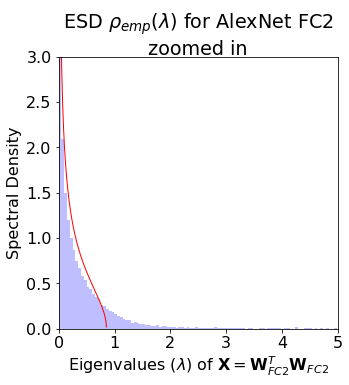

In [124]:
sigma = RMT_Util.plot_ESD_and_fit(model=None,eigenvalues=evals_FC2[evals_FC2<5], weightfile=None, layer=None, 
                            Q=Q, num_spikes = 450, sigma=None, color='blue')
plt.title(r"ESD $\rho_{emp}(\lambda)$ for AlexNet FC2"+"\n"+r"zoomed in")
plt.xlim([0,5])
plt.ylim([0,3])
plt.ylabel(r"Spectral Density")
plt.xlabel(r"Eigenvalues ($\lambda$) of $\mathbf{X}=\mathbf{W}_{FC2}^{T}\mathbf{W}_{FC2}$")
plt.savefig("img/alexnet-fc2.png")


## FC3

In [37]:
this_im = FC3_LAYER_ID

for im, m in enumerate(alexnet.modules()):
    if im == this_im:
        W_FC3 = np.array(m.weight.data.clone().cpu()) 
        Q = RMT_Util.get_Q(W_FC3)
        
        u, sv, sh = svd(W_FC3)
        evals_FC3 = sv*sv
        

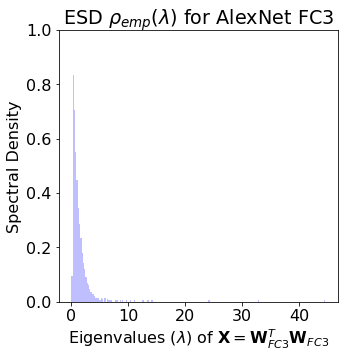

In [117]:
plt.hist(evals_FC3, bins=200,  alpha=0.25, color='blue', density=True);
plt.title(r"ESD $\rho_{emp}(\lambda)$ for AlexNet FC3")
plt.ylabel(r"Spectral Density")
plt.xlabel(r"Eigenvalues ($\lambda$) of $\mathbf{X}=\mathbf{W}_{FC3}^{T}\mathbf{W}_{FC3}$")
plt.ylim(0,1)
plt.savefig("img/alexnet-fc3-full.png")

RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Util\n",
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in multiply
  "## RMT Util\n",


% spikes outside bulk 18.25
% sigma 0.7110


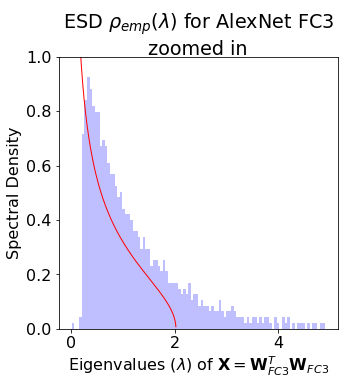

In [119]:
num_spikes = 150
sigma = RMT_Util.plot_ESD_and_fit(model=None,eigenvalues=evals_FC3[evals_FC3<5], weightfile=None, layer=None, 
                            Q=Q, num_spikes = num_spikes, sigma=None, color='blue')
plt.title(r"ESD $\rho_{emp}(\lambda)$ for AlexNet FC3"+"\n"+r"zoomed in")
plt.ylabel(r"Spectral Density")
plt.xlabel(r"Eigenvalues ($\lambda$) of $\mathbf{X}=\mathbf{W}_{FC3}^{T}\mathbf{W}_{FC3}$")
plt.ylim(0,1)
plt.savefig("img/alexnet-fc3.png")

## Log-Log Histogram Plots of the ESDs for AlexNet

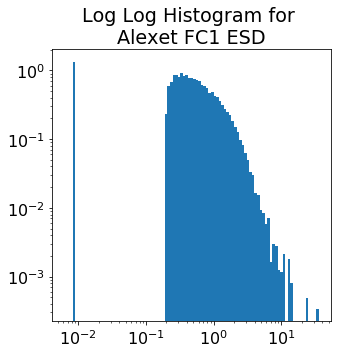

In [95]:
bins = np.logspace(np.log10(np.min(evals_FC1)), np.log10(np.max(evals_FC1)), num=100)
plt.hist(evals_FC3, bins=bins, density=True, log=True);
plt.xscale('log')
plt.title("Log Log Histogram for "+"\n"+r"Alexet FC1 ESD")
plt.savefig("img/alexnet-log-log-fc1.png")
plt.show()

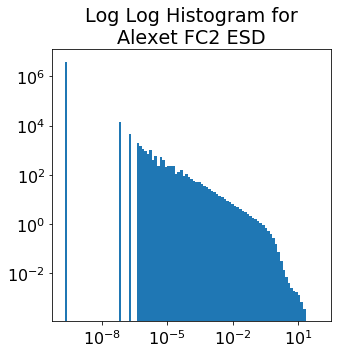

In [96]:
bins = np.logspace(np.log10(np.min(evals_FC2)), np.log10(np.max(evals_FC2)), num=100)
plt.hist(evals_FC2, bins=bins, density=True, log=True);
plt.xscale('log')
plt.title("Log Log Histogram for"+"\n"+r"Alexet FC2 ESD")
plt.savefig("img/alexnet-log-log-fc2.png")
plt.show()

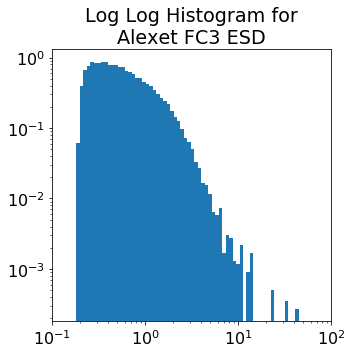

In [97]:
bins = np.logspace(np.log10(np.min(evals_FC3)), np.log10(np.max(evals_FC3)), num=100)
plt.hist(evals_FC3, bins=bins, density=True, log=True);
plt.xscale('log')
plt.title("Log Log Histogram for"+"\n"+r"Alexet FC3 ESD")
plt.savefig("img/alexnet-log-log-fc3.png")
plt.xlim(0.1, 100)
plt.show()

## PowerLaw Analysis of FC1, FC2, FC3,  Section 5.5 and Figure 11 

### FC1 Power Law Fit

In [127]:
alpha, D, best = RMT_Util.fit_powerlaw(evals_FC1, verbose=True)
print("alpha for FC1 {:3g}   D {:3g} best fit is {}".format(alpha, D, best))

Calculating best minimal value for power law fit
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Assuming nested distributions


alpha for FC1 2.28822   D 0.0527164 best fit is PL


### FC3 Power Law Fit

In [54]:
alpha, D, best = RMT_Util.fit_powerlaw(evals_FC3, verbose=True)

Calculating best minimal value for power law fit
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Assuming nested distributions


alpha for FC3 3.0198567377622387


/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:1602: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


In [60]:
print("alpha for FC3 {:3g}   D {:3g} best fit is {}".format(alpha, D, best))

alpha for FC3 3.01986   D 0.01856 best fit is PL


In [64]:
# guess mu as (3.5)/2 + 1

2.75

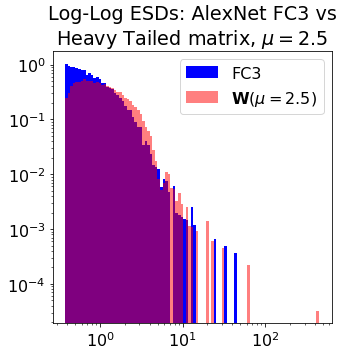

In [98]:
mu=2.5

W = np.random.pareto(mu,size=W_FC3.shape)
W = W/np.sqrt(np.max(W.shape))

Q = np.max(W.shape)/np.min(W.shape)
pvals, _ = RMT_Util.eigenspectrum(W)
bins = np.logspace(np.log10(np.min(pvals)), np.log10(np.max(pvals)), num=100)
plt.hist(evals_FC3, bins=bins, density=True, log=True, color='blue', label="FC3");

plt.hist(pvals, bins=bins, density=True, log=True, color='red', alpha=0.5, label=r"$\mathbf{W}(\mu=2.5)$");
plt.xscale('log')
plt.title("Log-Log ESDs: AlexNet FC3 vs"+"\n"+r"Heavy Tailed matrix, $\mu=2.5$")
plt.legend()
plt.savefig("img/alexnet-log-log-fc3-overlay.png")

## Repeat for FC2, smaller power law (Heavier tail)

In [100]:
alpha, D, best = RMT_Util.fit_powerlaw(evals_FC2, verbose=True)
print("alpha for FC2 {:3g}   D {:3g} best fit is {}".format(alpha, D, best))

Calculating best minimal value for power law fit
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Assuming nested distributions


alpha for FC2 2.24516   D 0.037172 best fit is PL


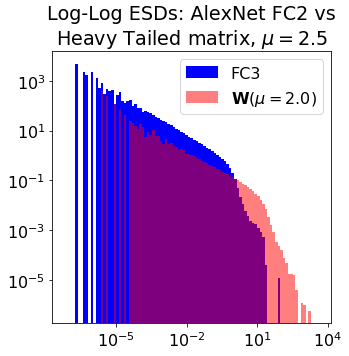

In [105]:
mu=2.0

W = np.random.pareto(mu,size=W_FC2.shape)
W = W/np.sqrt(np.max(W.shape))

Q = np.max(W.shape)/np.min(W.shape)
pvals, _ = RMT_Util.eigenspectrum(W)
bins = np.logspace(np.log10(np.min(pvals)), np.log10(np.max(pvals)), num=100)
plt.hist(evals_FC2, bins=bins, density=True, log=True, color='blue', label="FC3");

plt.hist(pvals, bins=bins, density=True, log=True, color='red', alpha=0.5, label=r"$\mathbf{W}(\mu=2.0)$");
plt.xscale('log')
plt.title("Log-Log ESDs: AlexNet FC2 vs"+"\n"+r"Heavy Tailed matrix, $\mu=2.5$")
plt.legend()
plt.savefig("img/alexnet-log-log-fc2-overlay.png")

Calculating best minimal value for power law fit
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Assuming nested distributions


alpha for FC1 2.28822   D 0.0527164 best fit is PL
